In [1]:
import glob
import numpy as np

from obspy import read      ## Optional for mseed file reading with obspy module
from geographiclib.geodesic import Geodesic  ## Optional for calculating the distance between two geographic location points (with latitude and longitude) on Earth

In [4]:
# Load Earthquake Binary Data
BinaryDataDirectory = "./earthquakes_binary"
BinaryFileName = glob.glob(BinaryDataDirectory+'/*.bin')[0]
DataArrayRead = np.fromfile(BinaryFileName,dtype='float64').reshape(129,7200)  # 129 stations in total, detailed station location parameters see Stations_FULL.txt

# Load Glacial Binary Data
# BinaryDataDirectory = "./Glacial_Binary"
# BinaryFileName = glob.glob(BinaryDataDirectory+'/*.bin')[0]
# DataArrayRead = np.fromfile(BinaryFileName,dtype='float64').reshape(129,7200)


In [14]:
EventListName = 'glacial'
# EventListName = 'earthquakes'
MseedDataDirectory = "./%s" %EventListName
MseedFileName = glob.glob(MseedDataDirectory+'/*.mseed')[-10]

DataStream = read(MseedFileName,format='MSEED')
FileName = MseedFileName.split('/')[-1].split('.')[0]# Get the event name
print(FileName)

StartString = str(DataStream[0].stats.starttime)[0:-11]  # Locate the start string in the catalog file
print(StartString)

E199709120359
1997-09-12T03:59


In [15]:
StationLatLon = dict()
with open("./stations_full.txt", 'r') as f:
    for line in f:
        if line.startswith('#'):
            continue
        NetworkCode = line.split()[0]
        StationCode = line.split()[1]

        StationLatLon[NetworkCode+'.'+StationCode] = [float(line.split()[2]),float(line.split()[3])]

if EventListName == 'earthquakes':
    with open("./earthquakes_catalog.txt", 'r') as f:
        for line in f:
            if line.startswith(StartString):
                print(line)
                SourceLat = float(line.split('|')[1].split(',')[0])
                SourceLon = float(line.split('|')[1].split(',')[1])
elif EventListName == 'glacial':
    with open("./glacial_catalog.txt", 'r') as f:
        for line in f:
            if FileName in line:
                print(line)
                SourceLat = float(line.split()[0])
                SourceLon = float(line.split()[1])  
else:
    print("key not found!!!")
print("Source: ", SourceLat, SourceLon)

for itrace, trace in enumerate(DataStream):
    StationName = DataStream[itrace].stats.network + "." + DataStream[itrace].stats.station
    EventStationPair = Geodesic.WGS84.Inverse(SourceLat,SourceLon,StationLatLon[StationName][0],StationLatLon[StationName][1], outmask=1929)
    DataStream[itrace].stats.distance = EventStationPair['s12']
    # DataStream[itrace].stats.coordinates.latitude = StationLatLon[StationName][0]
    # DataStream[itrace].stats.coordinates.longitude = StationLatLon[StationName][1]

 68.64  -33.10   0.94  129   -0.68  1997  9 12  3 59 20.00   69.25  -32.75  5.0  1    1 E199709120359 

Source:  68.64 -33.1


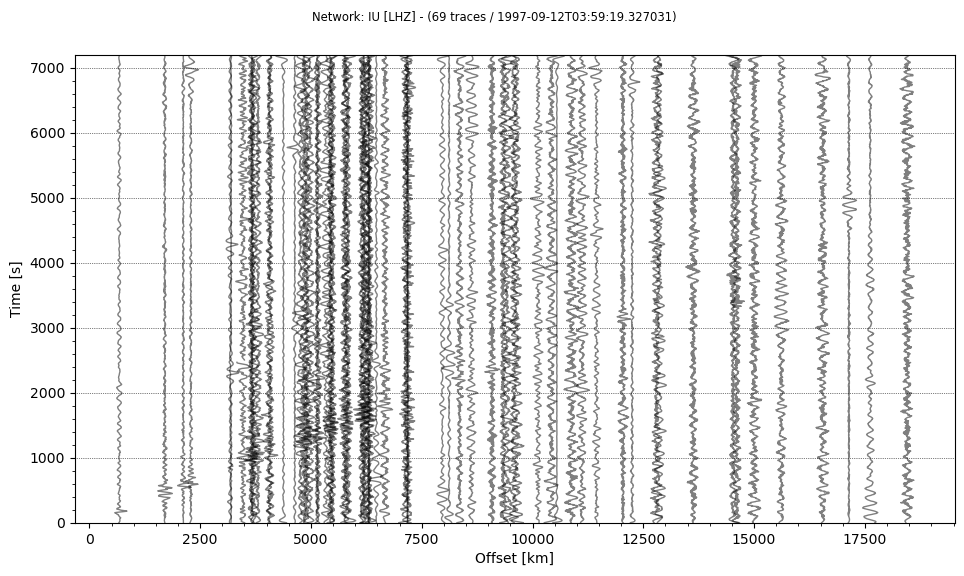

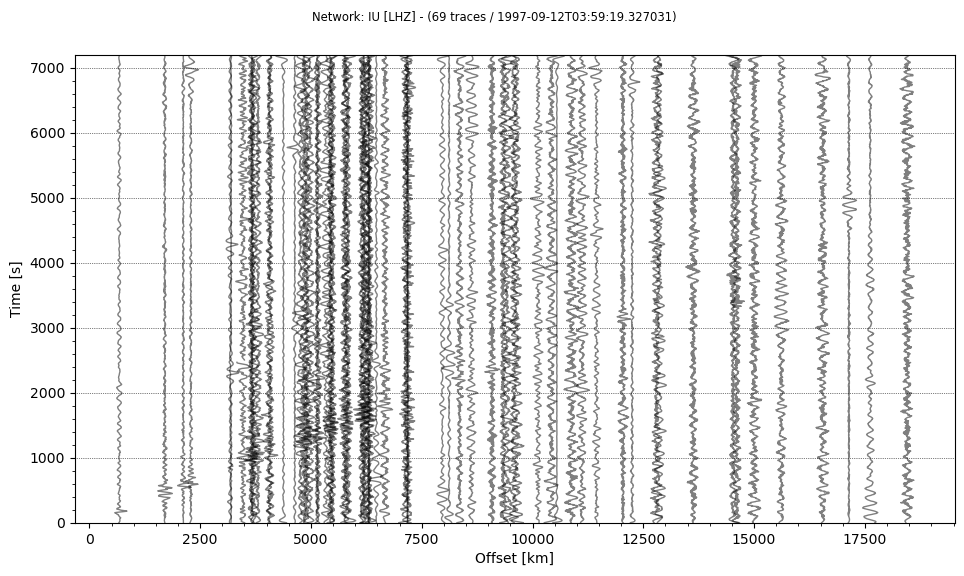

In [16]:
DataStream.plot(type="section") #type="normal", plot seismogram along the station to source distance